### Edgar Moises Hernandez-Gonzalez
#### 12/12/19-10/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D
##### Caracteristicas = Coeficientes DWT-db4, dos niveles
##### 5 ejecuciones independientes

##### Sujeto 1
##### Accuracy = 47.92%
##### Kappa = 0.3056

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 1013))
x_test = x_test.reshape((n_samples_test, 22, 1013))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1013)
(288, 22, 1013)


In [0]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1013, 22)
(288, 1013, 22)


In [0]:
def CNN_1D():
  model = Sequential()
  model.add(Conv1D(16,7, activation='relu', input_shape=x_train.shape[1:]))
  model.add(MaxPool1D(2))
  model.add(Conv1D(32,7, activation='relu'))
  model.add(MaxPool1D(2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
  
  optimizer = Adam(lr=1e-3)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 - 0s - loss: 7.8922 - acc: 0.4097
kappa:  0.2129629629629629
f1: 0.3790049817110132
confusion matrix:
 [[23 26  5 18]
 [22 30  4 16]
 [ 6  6 10 50]
 [ 3  7  7 55]]


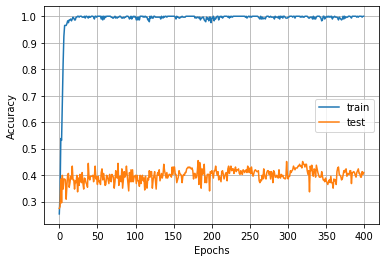

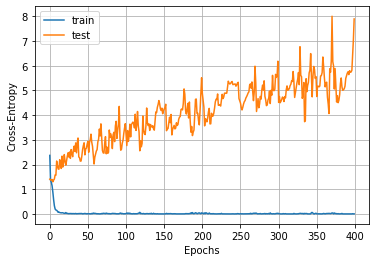

Iteration: 2
288/288 - 0s - loss: 5.2913 - acc: 0.4236
kappa:  0.2314814814814815
f1: 0.40936308455219667
confusion matrix:
 [[24 28  7 13]
 [26 33  6  7]
 [11  6 17 38]
 [ 5  7 12 48]]


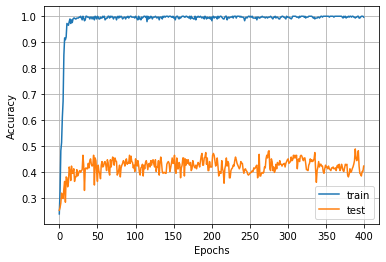

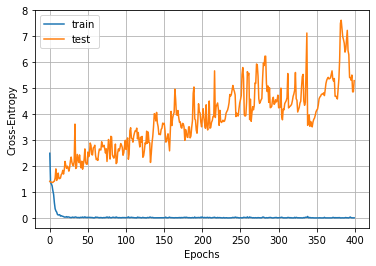

Iteration: 3
288/288 - 0s - loss: 6.4985 - acc: 0.4097
kappa:  0.2129629629629629
f1: 0.41074608698812004
confusion matrix:
 [[34 15 19  4]
 [28 30 12  2]
 [12  6 31 23]
 [20  4 25 23]]


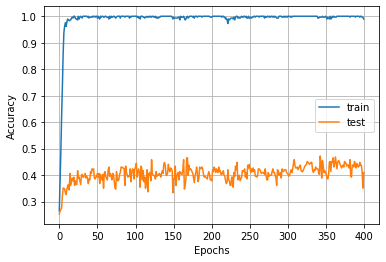

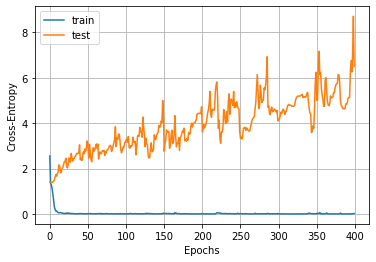

Iteration: 4
288/288 - 0s - loss: 5.6286 - acc: 0.4306
kappa:  0.2407407407407407
f1: 0.394729991714289
confusion matrix:
 [[46 12  3 11]
 [41 26  3  2]
 [25  4  5 38]
 [15  0 10 47]]


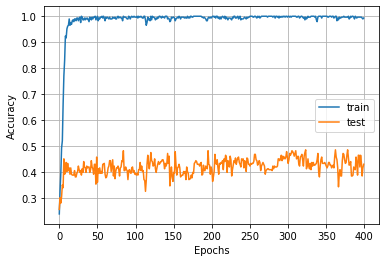

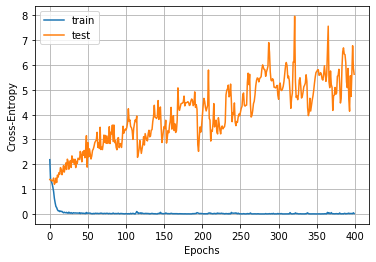

Iteration: 5
288/288 - 0s - loss: 4.6501 - acc: 0.4410
kappa:  0.25462962962962965
f1: 0.44102008905392465
confusion matrix:
 [[29 23 17  3]
 [35 27  9  1]
 [10  0 41 21]
 [ 8  2 32 30]]


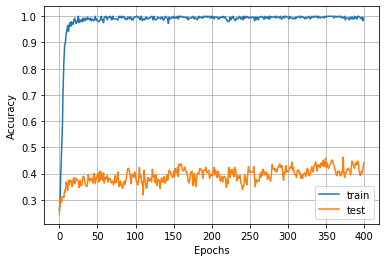

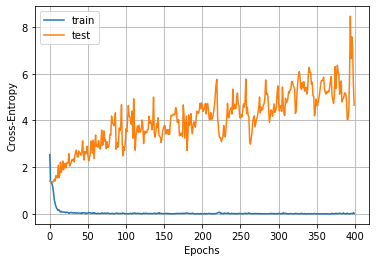


Resultados:
loss: [7.892160203721788, 5.291284640630086, 6.498450915018718, 5.628592809041341, 4.650122404098511]
accuracy: [0.4097222, 0.4236111, 0.4097222, 0.43055555, 0.4409722]
kappa: [0.2129629629629629, 0.2314814814814815, 0.2129629629629629, 0.2407407407407407, 0.25462962962962965]
f1: [0.3790049817110132, 0.40936308455219667, 0.41074608698812004, 0.394729991714289, 0.44102008905392465]


In [0]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_1D()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1007, 16)          2480      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 503, 16)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 497, 32)           3616      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 248, 32)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7936)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1015936   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [0]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.4229
Mean Kappa: 0.2306
Mean F1: 0.4070
Max Accuracy: 0.4410
Max Kappa: 0.2546
Max F1: 0.4410
